# Amazon Fine Food Reviews Analysis
Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews
The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).


In [58]:
!pip install --upgrade "ipython[all]"

Requirement already up-to-date: ipython[all] in /opt/conda/envs/py3.6/lib/python3.6/site-packages (6.4.0)
Requirement not upgraded as not directly required: jedi>=0.10 in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (0.11.0)
Requirement not upgraded as not directly required: simplegeneric>0.8 in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (0.8.1)
Requirement not upgraded as not directly required: pickleshare in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (0.7.4)
Requirement not upgraded as not directly required: prompt-toolkit<2.0.0,>=1.0.15 in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (1.0.15)
Requirement not upgraded as not directly required: backcall in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (0.1.0)
Requirement not upgraded as not directly required: pexpect; sys_platform != "win32" in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[a

Requirement not upgraded as not directly required: html5lib!=0.9999,!=0.99999,<0.99999999,>=0.999 in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from bleach->nbconvert; extra == "all"->ipython[all]) (0.9999999)


In [2]:
!pip install pydrive
!pip install gensim
!pip install nltk
!pip install seaborn
!pip install xgboost
!wget --header='Host: doc-14-34-docs.googleusercontent.com' --header='User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36' --header='Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' --header='Accept-Language: en-US,en;q=0.9' --header='Cookie: AUTH_sl8scr3r78dtlbjs5mvoco4ilf6h1a3b=09929041593969215305|1531468800000|u59ib6rmr97ctn3dvalen1hqiaup4fhq; NID=130=LXZwJ_B1s7OlagMooX3o0cdKaSHL3frN5ha4lIftM8TuGzoTCmfcWXpJ3cNRIcbkyUPqb3Jy-XQmP9UHSogzUlrWBiowlnwfwg3Cx-F6T5acQOD-gO27Uk1dFzgik3yZ' --header='Connection: keep-alive' 'https://doc-14-34-docs.googleusercontent.com/docs/securesc/sr3ne958tilodvhhec79bitjd2u2bnlr/t4ul11orpkbo7g1j7a551rv07qf911pf/1531468800000/09929041593969215305/09929041593969215305/1cZS7OUXVft4KTZ1AzZPu95hSgWzu3aC8?e=download' -O 'final.sqlite' -c

--2018-07-21 10:04:11--  https://doc-14-34-docs.googleusercontent.com/docs/securesc/sr3ne958tilodvhhec79bitjd2u2bnlr/t4ul11orpkbo7g1j7a551rv07qf911pf/1531468800000/09929041593969215305/09929041593969215305/1cZS7OUXVft4KTZ1AzZPu95hSgWzu3aC8?e=download
Resolving doc-14-34-docs.googleusercontent.com (doc-14-34-docs.googleusercontent.com)... 172.217.10.33, 2607:f8b0:4006:803::2001
Connecting to doc-14-34-docs.googleusercontent.com (doc-14-34-docs.googleusercontent.com)|172.217.10.33|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2018-07-21 10:04:11 ERROR 403: Forbidden.



In [3]:
# loading libraries and data

%matplotlib inline

import sqlite3                          # for sql database
import pandas as pd
import numpy as np
import nltk                             # nltk:- Natural Language Processing Toolkit
import string
import re
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


import pickle
def saveindisk(obj,filename):
    pickle.dump(obj,open(filename+".p","wb"), protocol=4)
def openfromdisk(filename):
    temp = pickle.load(open(filename+".p","rb"))
    return temp

con = sqlite3.connect("final.sqlite")

# Filtering only positive and negative reviews that is
# not taking into consideration those reviews with score = 3
df = pd.read_sql_query("""
SELECT *
FROM Reviews
""", con)

In [4]:
df.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,CleanedText_NoStem
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,b'bought sever vital can dog food product foun...,b'bought several vitality canned dog food prod...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,b'product arriv label jumbo salt peanut peanut...,b'product arrived labeled jumbo salted peanuts...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,b'confect around centuri light pillowi citrus ...,b'confection around centuries light pillowy ci...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,b'look secret ingredi robitussin believ found ...,b'looking secret ingredient robitussin believe...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...,b'great taffi great price wide assort yummi ta...,b'great taffy great price wide assortment yumm...


In [5]:
df.describe()

,index,Id,HelpfulnessNumerator,HelpfulnessDenominator,Time
count,364171.000000,364171.000000,364171.000000,364171.000000,3.641710e+05
mean,241825.377603,261814.561014,1.739021,2.186841,1.296135e+09
std,154519.869452,166958.768333,6.723921,7.348482,4.864772e+07
min,0.000000,1.000000,0.000000,0.000000,9.393408e+08
25%,104427.500000,113379.500000,0.000000,0.000000,1.270858e+09
50%,230033.000000,249445.000000,0.000000,1.000000,1.311379e+09
75%,376763.500000,407408.500000,2.000000,2.000000,1.332893e+09
max,525813.000000,568454.000000,866.000000,878.000000,1.351210e+09


In [6]:
df.shape

(364171, 13)

In [7]:
df['Score'].size

364171

In [8]:
# Taking Sample Datapoints
n_samples = 15000
df_sample = df.sample(n_samples)
df_sample.sort_values('Time', inplace=True) #Sorting with respect to time
df_sample.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,CleanedText_NoStem
117901,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,Positive,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,b'rememb see show air televis year ago child s...,b'remember seeing show aired television years ...
104684,121041,131217,B00004RAMX,A5NQLNC6QPGSI,Kim Nason,7,8,Positive,965001600,End your Gopher Problems,I have just recently purchased the Woodstream ...,b'recent purchas woodstream corp gopher trap w...,b'recently purchased woodstream corp gopher tr...
169304,212495,230309,B00004RYGX,A34NBH479RB0E,"""dmab6395""",0,1,Positive,977184000,FUNNY,"I THOUGHT THIS MOVIE WAS SO FUNNY, MICHAEL KEA...",b'thought movi funni michael keaton beetlejuic...,b'thought movie funny michael keaton beetlejui...
316051,443667,479728,B00005U2FA,AR5RRP9N2UXDJ,"Boraxo ""Boraxo""",21,23,Positive,1029196800,It really works,"I was very skeptical when I bought this item, ...",b'skeptic bought item imagin amaz discov actua...,b'skeptical bought item imagine amazement disc...
332204,473032,511568,B0000D94PG,A2801SG8XA9LNX,PACW,8,8,Positive,1069113600,Almost wonderful,I have relied on these cake mixes for a few ye...,b'reli cake mix year find handi tast fine suga...,b'relied cake mixes years find handy taste fin...


In [9]:
def polarity(x):
    if x == "Positive":
        return 0
    else:
        return 1
df_sample['Score'] = df_sample['Score'].map(polarity)

# Applying the Support Vector Machine on the different Vectorizing Techniques


## Bag of Word(BOW)

<img src="https://aitrends.com/wp-content/uploads/2018/01/1-19SVM-2.jpg">

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(df_sample['CleanedText'].values,df_sample['Score'].values,test_size=0.3,shuffle=False)

bi_gram = CountVectorizer() 
X_train = bi_gram.fit_transform(X_train)
X_train = preprocessing.normalize(X_train)

X_test = bi_gram.transform(X_test)
X_test = preprocessing.normalize(X_test)

In [11]:
# GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import TimeSeriesSplit

clf = SVC()
param_grid = {'gamma':[1,0.5,0.1,0.05],
             'C':[1,0.5,0.1,0.05]} # params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1,n_jobs=-1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.4min finished


Best HyperParameter:  {'C': 1, 'gamma': 1}
Best Accuracy: 86.92%


In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.89      0.99      0.93      3750
          1       0.86      0.37      0.52       750

avg / total       0.88      0.88      0.87      4500



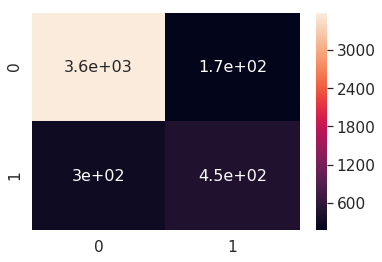

In [13]:
clf = SVC(C=50, gamma=0.05)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [15]:
# RandomSearch
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import TimeSeriesSplit

clf = SVC()
param_grid = {'gamma':[1,0.5,0.1,0.05],
             'C':[1,0.5,0.1,0.05]} # params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = RandomizedSearchCV(clf,param_grid,cv=tscv,verbose=1,n_jobs=-1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   58.8s finished


Best HyperParameter:  {'gamma': 1, 'C': 1}
Best Accuracy: 86.92%


In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.89      0.99      0.93      3750
          1       0.86      0.37      0.52       750

avg / total       0.88      0.88      0.87      4500



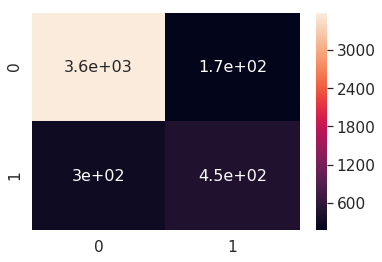

In [17]:
clf = SVC(C=50, gamma=0.05)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [18]:
y_pred

array([0, 1, 1, ..., 0, 0, 0])

## Using SGDClassifier with hingloss

In [20]:
# hinge-loss
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='hinge')
param_dist = {'penalty':['l1','l2'],
             'alpha':[0.5,0.1,0.05,0.01]} 
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_dist,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best HyperParameter:  {'alpha': 0.5, 'penalty': 'l1'}
Best Accuracy: 84.11%


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.1s finished


/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


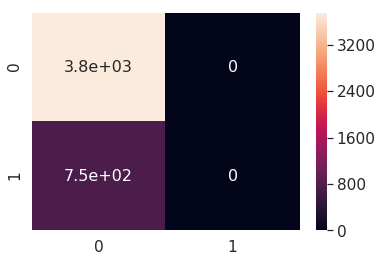

In [21]:
clf = SGDClassifier(alpha=0.5,penalty='l1', loss='hinge')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [22]:
print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.83      1.00      0.91      3750
          1       0.00      0.00      0.00       750

avg / total       0.69      0.83      0.76      4500



/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
# Area under curve error
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
area = auc(fpr, tpr)
print(area)

0.5


# Tf-Idf Features

### Random Forest

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_sample['CleanedText'].values,df_sample['Score'].values,test_size=0.3,shuffle=False)

In [25]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
X_train = tfidf.fit_transform(X_train)

X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)
X_test = tfidf.transform(X_test)

X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (10500, 239969)
Test Data Size:  (4500, 239969)


In [26]:
clf = SVC()
clf.fit(X_train, y_train)

print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.833333333333


In [27]:
clf = SVC()
param_grid = {'gamma':[1,0.5,0.1,0.05],
             'C':[1,0.5,0.1,0.05]} # params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1,n_jobs=-1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  3.8min finished


Best HyperParameter:  {'C': 1, 'gamma': 0.5}
Best Accuracy: 84.54%


                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.87      1.00      0.93      3750
          1       0.96      0.22      0.36       750

avg / total       0.88      0.87      0.83      4500



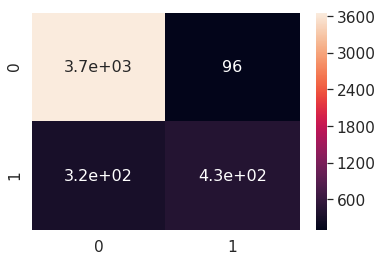

In [28]:
print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))
clf = SVC(C=50, gamma=0.05)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [29]:
# RandomSearch
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import TimeSeriesSplit

clf = SVC()
param_grid = {'gamma':[1,0.5,0.1,0.05],
             'C':[1,0.5,0.1,0.05]} # params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = RandomizedSearchCV(clf,param_grid,cv=tscv,verbose=1,n_jobs=-1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished


Best HyperParameter:  {'gamma': 0.5, 'C': 1}
Best Accuracy: 84.54%


In [30]:
print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.87      1.00      0.93      3750
          1       0.96      0.22      0.36       750

avg / total       0.88      0.87      0.83      4500



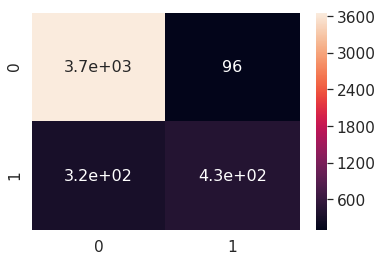

In [31]:
clf = SVC(C=50, gamma=0.05)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [32]:
# Area under curve error
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
area = auc(fpr, tpr)
print("Area under curve:", area)

Area under curve: 0.773866666667


# Avg Word2Vec

In [33]:
list_corpus = df_sample["Text"].tolist()
list_labels = df_sample["Score"].tolist()

In [34]:
from gensim.models import KeyedVectors
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
w2v_model_google = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

--2018-07-21 10:22:58--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.81.19
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.81.19|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [35]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['CleanedText'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [36]:
embeddings = get_word2vec_embeddings(w2v_model_google, df_sample)
X_sample, _, y_sample, _ = train_test_split(embeddings, list_labels, test_size=0.15)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample)

In [37]:
clf = SVC()
clf.fit(X_train, y_train)

print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.846298619824


In [38]:
clf = SVC()
param_grid = {'gamma':[1,0.5,0.1,0.05],
             'C':[1,0.5,0.1,0.05]} # params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1,n_jobs=-1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.0min finished


Best HyperParameter:  {'C': 1, 'gamma': 1}
Best Accuracy: 84.00%


                 Classification Report Test Data


/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2698
          1       0.00      0.00      0.00       490

avg / total       0.72      0.85      0.78      3188



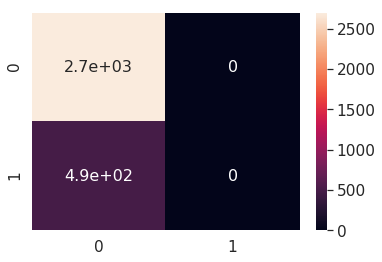

In [39]:
print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))
clf = SVC(C=50, gamma=0.05)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [40]:
# RandomSearch
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import TimeSeriesSplit

clf = SVC()
param_grid = {'gamma':[1,0.5,0.1,0.05],
             'C':[1,0.5,0.1,0.05]} # params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = RandomizedSearchCV(clf,param_grid,cv=tscv,verbose=1,n_jobs=-1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


Best HyperParameter:  {'gamma': 0.05, 'C': 1}
Best Accuracy: 84.00%


In [41]:
print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2698
          1       0.00      0.00      0.00       490

avg / total       0.72      0.85      0.78      3188



/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


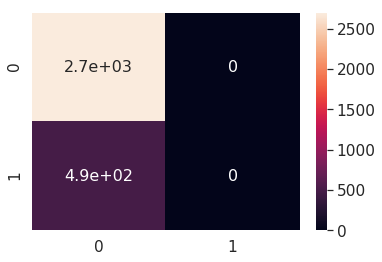

In [42]:
clf = SVC(C=50, gamma=0.05)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [43]:
# Area under curve error
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
area = auc(fpr, tpr)
print("Area under curve:", area)

Area under curve: 0.5


# Tf-IDF Word2vec

In [44]:
n_samples = 5000
df_sample_new = df_sample.sample(n_samples)
df_sample_new.sort_values('Time',inplace=True) 

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2)) # Using bi-grams
tfidf_vec_new = tfidf.fit_transform(df_sample_new['CleanedText_NoStem'].values)
print(tfidf_vec_new.shape)
features = tfidf.get_feature_names()

(5000, 149273)


In [45]:
tfidf_w2v_vec_google = openfromdisk('tfidf_w2v_vec_google')

In [46]:
tfidfw2v_vecs_norm = preprocessing.normalize(tfidf_w2v_vec_google)

In [47]:
X_sample, _, y_sample, _  = train_test_split(tfidfw2v_vecs_norm, df_sample_new['Score'], test_size=0.15)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample)

In [48]:
clf = SVC()
clf.fit(X_train, y_train)

print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.839134524929


In [49]:
clf = SVC()
param_grid = {'gamma':[1,0.5,0.1,0.05],
             'C':[1,0.5,0.1,0.05]} # params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1,n_jobs=-1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   21.7s finished


Best HyperParameter:  {'C': 1, 'gamma': 1}
Best Accuracy: 84.78%


                 Classification Report Test Data


/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.84      1.00      0.91       892
          1       0.00      0.00      0.00       171

avg / total       0.70      0.84      0.77      1063



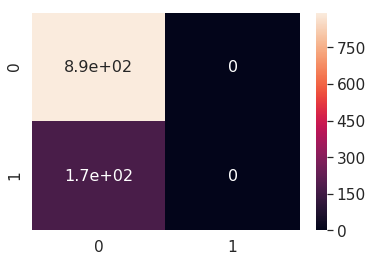

In [50]:
print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))
clf = SVC(C=50, gamma=0.05)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [51]:
# RandomSearch
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import TimeSeriesSplit

clf = SVC()
param_grid = {'gamma':[1,0.5,0.1,0.05],
             'C':[1,0.5,0.1,0.05]} # params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = RandomizedSearchCV(clf,param_grid,cv=tscv,verbose=1,n_jobs=-1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.6s finished


Best HyperParameter:  {'gamma': 1, 'C': 0.1}
Best Accuracy: 84.78%


In [52]:
print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.84      1.00      0.91       892
          1       0.00      0.00      0.00       171

avg / total       0.70      0.84      0.77      1063



/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


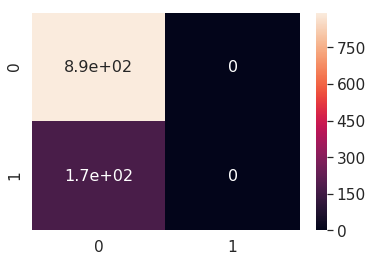

In [53]:
clf = SVC(C=50, gamma=0.05)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [54]:
# Area under curve error
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
area = auc(fpr, tpr)
print("Area under curve:", area)

Area under curve: 0.5


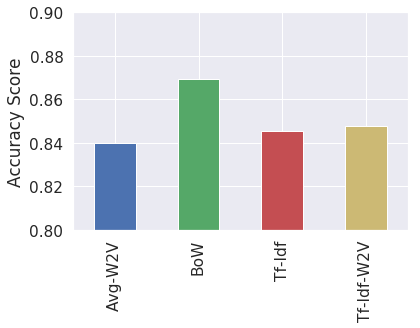

In [57]:
SVM_model_accuracy = {
    'BoW': 0.8692,
    'Tf-Idf':0.8454,
    'Avg-W2V': 0.8400,
    'Tf-Idf-W2V': 0.8478
}

pd.Series(SVM_model_accuracy).plot(kind='bar', color='bgry')
plt.ylabel('Accuracy Score')
plt.ylim((0.80, 0.90));

# Conclusion:
* From the above bar graph we can say that BOW has given the best accuracy compare to the other using support vector machine.